In [1]:
#These are some of the packages used in this project
import pandas as pd
import numpy as np
#import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#function to read the data placed in the file.
df=pd.read_csv('C:/Users/Adarsh Kumar/Desktop/Mall_Customers.csv')
df.head()#it will print first five row of the database


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [40]:
df.drop(["CustomerID"], axis = 1, inplace=True)#drop customer id fron the database.

df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


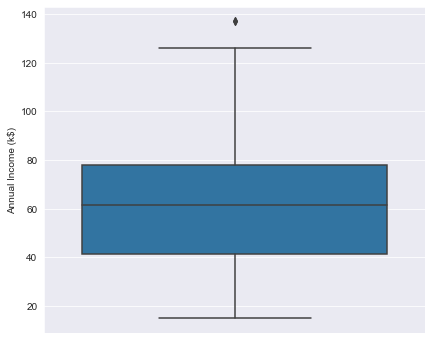

In [41]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Annual Income (k$)"])#box plot of annual income of the complete dataset.
plt.show()

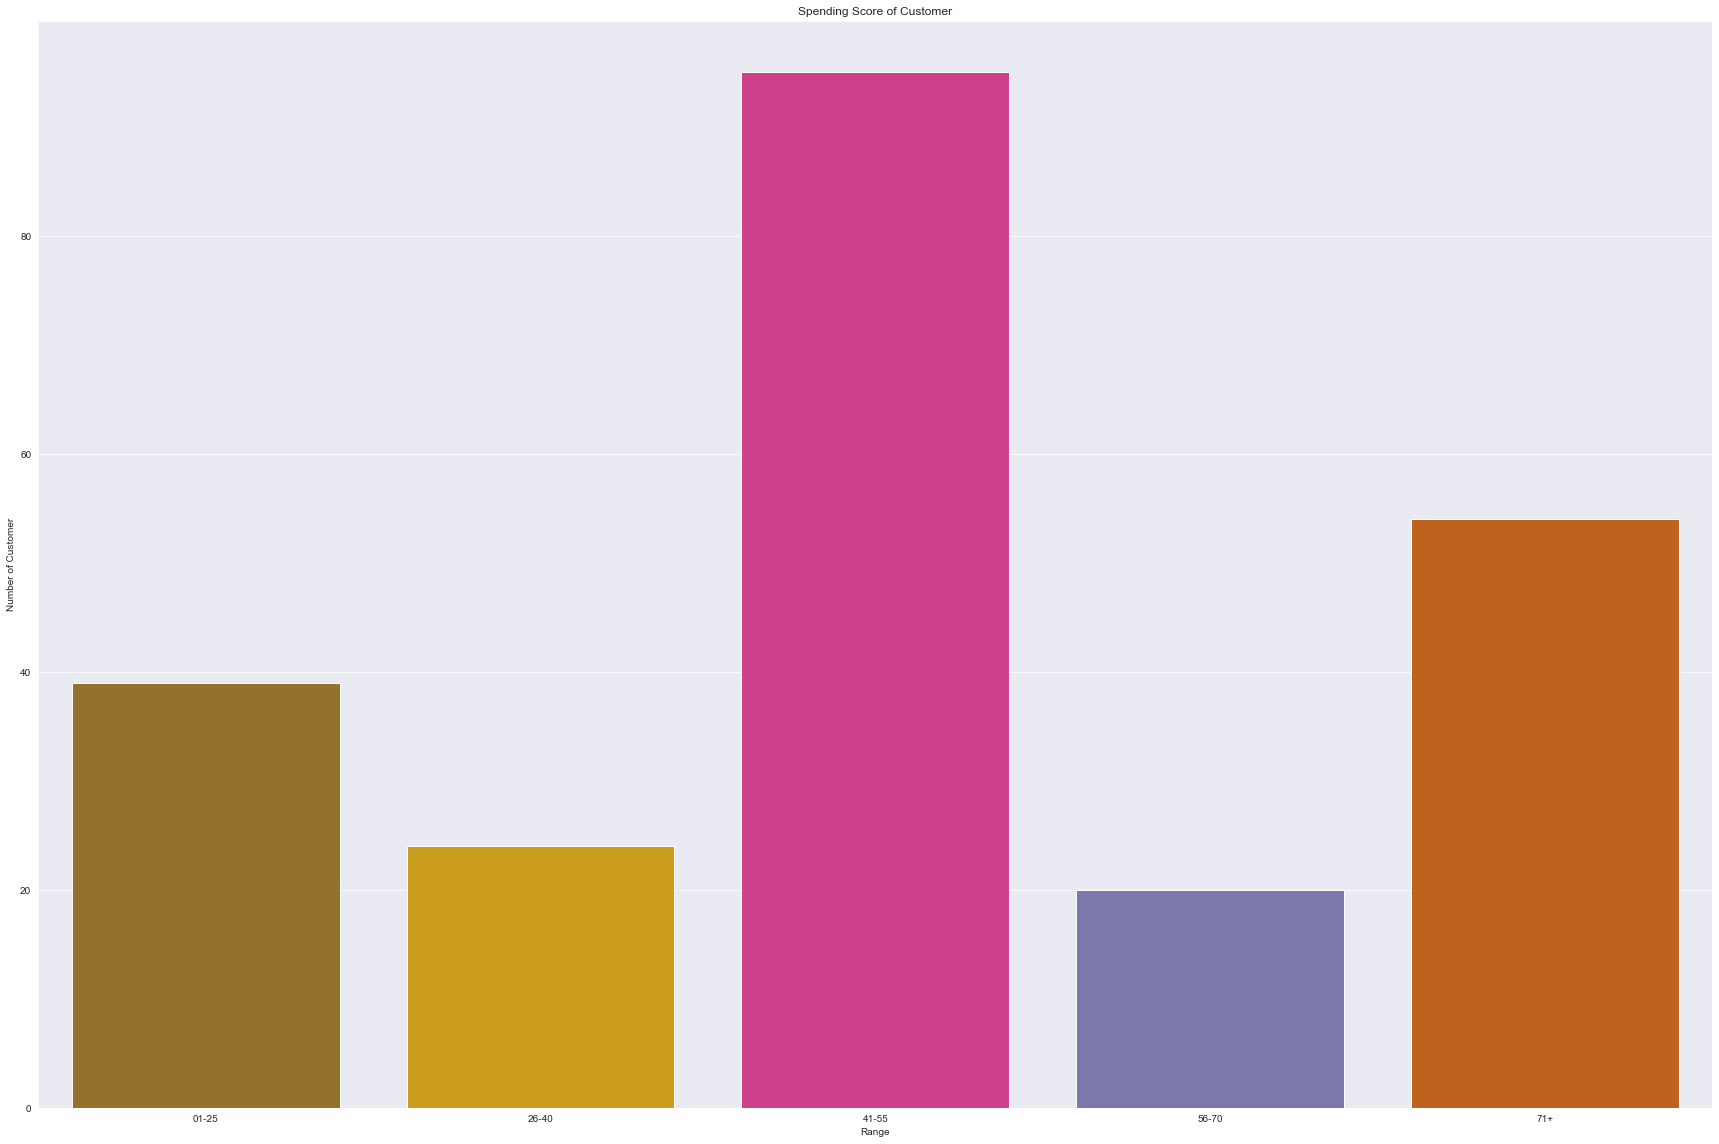

In [51]:
#Distribution of Spending score in different age group.

F=df["Spending Score (1-100)"]#takes the value of column "Spending Score".
score01_25 =F.values[((F.values<= 25) & (F.values >= 1))]
score26_40 =F.values[((F.values<= 40) & (F.values >= 26))]
score41_55 =F.values[((F.values<= 75) & (F.values >= 42))]
score56_70 =F.values[((F.values<= 70) & (F.values >= 57))]
score71above =F.values[(F.values >= 71)]

x = ["01-25","26-40","41-55","56-70","71+"]
y = [len(score01_25),len(score26_40),len(score41_55),len(score56_70),len(score71above)]

plt.figure(figsize=(30,20))
sns.barplot(x=x, y=y, palette="Dark2_r")#Bar plot
plt.title("Spending Score of Customer")
plt.xlabel("Range")
plt.ylabel("Number of Customer")
plt.show()

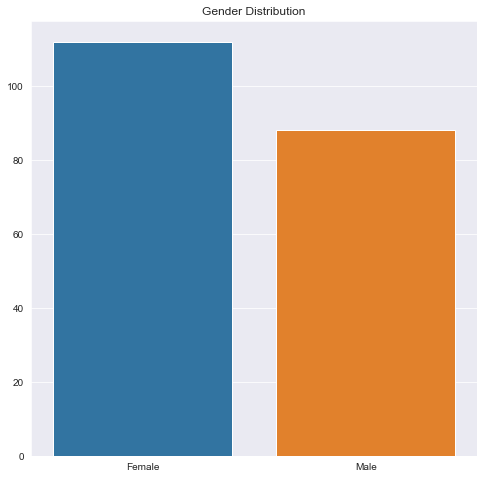

In [52]:
#ploting number of male and female in the dataset.
genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(8,8))
sns.barplot(x=genders.index, y=genders.values)
plt.title("Gender Distribution")
plt.show()

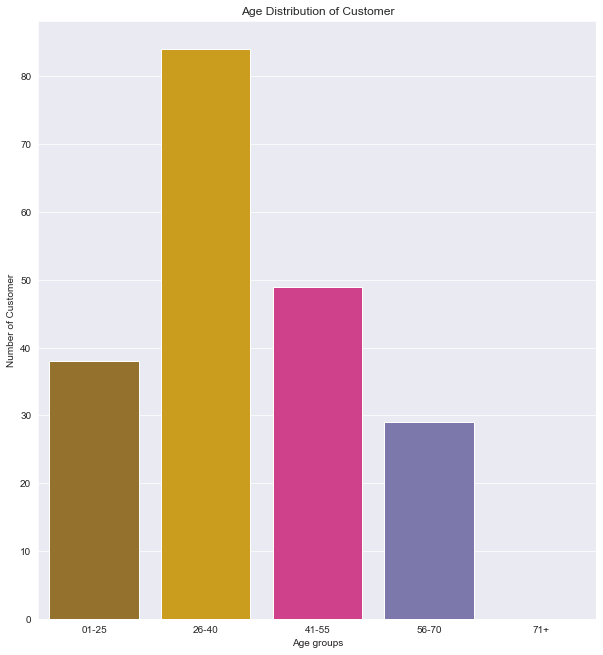

In [53]:
#Age distribution of customer i.e no. of customer of different age group.

age01_25 = df.Age[(df.Age <= 25) & (df.Age >= 1)]
age26_40 = df.Age[(df.Age <= 40) & (df.Age >= 26)]
age41_55 = df.Age[(df.Age <= 55) & (df.Age >= 41)]
age56_70 = df.Age[(df.Age <= 70) & (df.Age >= 56)]
age71above = df.Age[df.Age >= 71]

x = ["01-25","26-40","41-55","56-70","71+"]
y = [len(age01_25.values),len(age26_40.values),len(age41_55.values),len(age56_70.values),len(age71above.values)]

plt.figure(figsize=(10,11))
sns.barplot(x=x, y=y, palette="Dark2_r")
plt.title("Age Distribution of Customer")
plt.xlabel("Age groups")
plt.ylabel("Number of Customer")
plt.show()

No handles with labels found to put in legend.


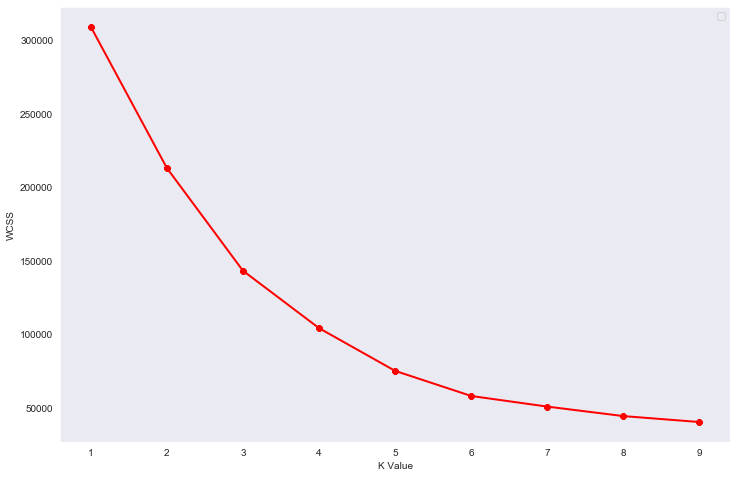

In [58]:
# Elbow method to determine the optimized value number of clusters i.e k.

from sklearn.cluster import KMeans
wcss = []  #within cluster square sum.
#range of k is taken upto 10 so that the perfect value of k can be easily visualized.
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,8))    
plt.grid()
plt.plot(range(1,10),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,10,1))
plt.ylabel("WCSS")
plt.legend()
plt.show()

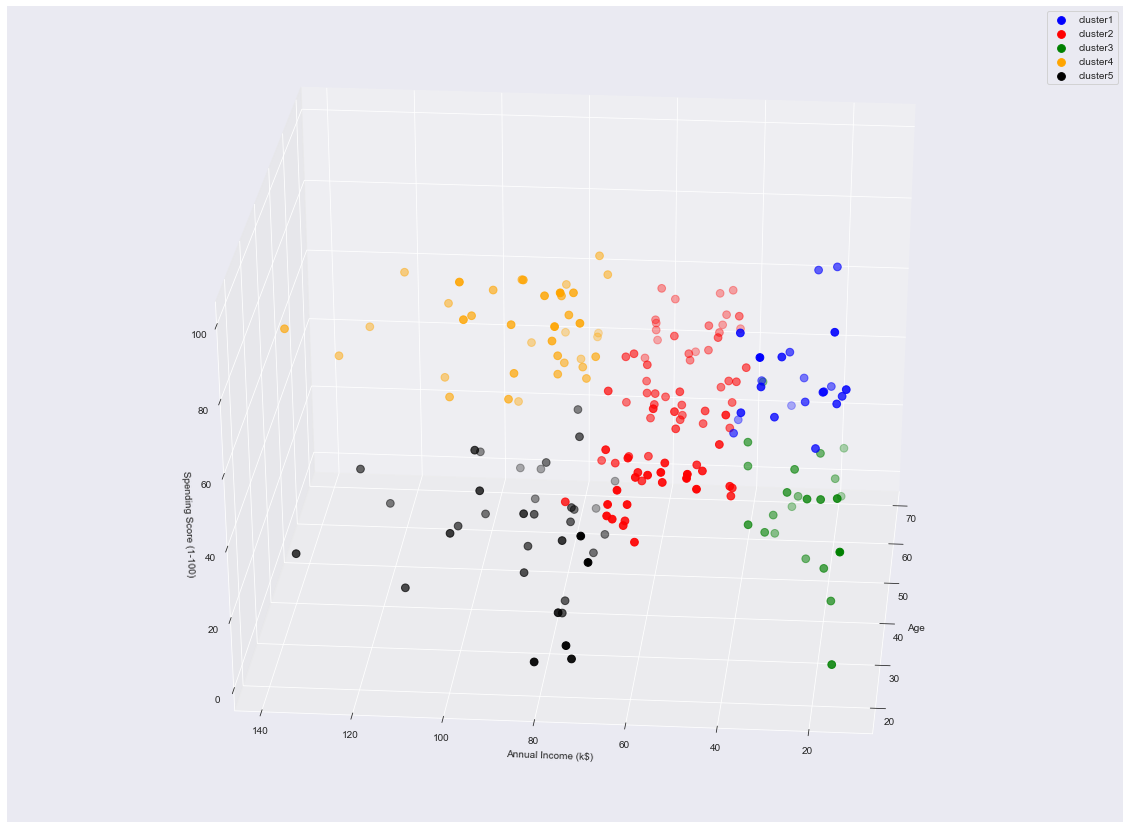

In [56]:
km = KMeans(n_clusters=5) #Number of cluster found from Elbow method is 5.
clusters = km.fit_predict(df.iloc[:,1:])
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D # package is imported for 3D plot.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')
# scatter plot having 3 axes one for annual income, spending score, age.
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0],label='cluster1',c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1],label='cluster2', c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2],label='cluster3', c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3],label='cluster4', c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4],label='cluster5', c='black', s=60)
ax.view_init(30, 185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.legend()
plt.show()